# Maximum Likelihood Estimation

In [4]:
!wget "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/get_colors.py" "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/utils.py"

--2021-12-21 02:15:20--  https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/get_colors.py
Resolving aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)... 52.217.101.60
Connecting to aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)|52.217.101.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256 [text/x-python-script]
Saving to: ‘get_colors.py.1’

get_colors.py.1     100%[===================>]     256  --.-KB/s    in 0s      

2021-12-21 02:15:21 (36,8 MB/s) - ‘get_colors.py.1’ saved [256/256]

--2021-12-21 02:15:21--  https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/utils.py
Reusing existing connection to aicore-files.s3.amazonaws.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2733 (2,7K) [text/x-python-script]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2,67K  --.-KB/s    in 0s      

2021-12-21 02:15:21 (301 MB/s) - ‘utils.py’ saved [2733/2733]

FINISHED --2021-12-2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from utils import get_regression_data, show_regression_data

X, Y = get_regression_data()

X = X[:, 0]
class GaussianPDF:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        p_x = np.exp(-(x - self.mu)**2 / (2*self.sigma**2)) / ( np.sqrt(2*np.pi) * self.sigma) ## pdf equation for gaussian
        return p_x

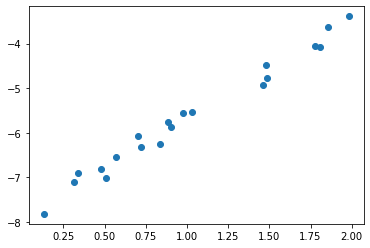

In [10]:
plt.scatter(X, Y)

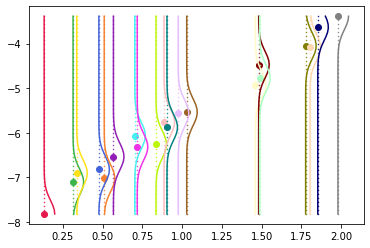

In [6]:
from get_colors import colors

def plot_dist(x, y, color='blue'):
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 0.3)
    distributions = 0.05*p(domain) # scale down the size of the distributions for visualisation purposes
    p_plot = distributions + x # place the distribution extending from the x position of the example which it corresponds to
    plt.plot(p_plot, domain, c=colors[i%len(colors)]) # plot each distribution of predicted labels against
    plt.scatter(np.ones_like(domain)*x, domain, c=colors[i%len(colors)], marker='.', s=1)

for i in range(len(X)):
    x = X[i]
    y = Y[i]
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 1)
    plt.scatter(x, y, c=colors[i%len(colors)])
    plot_dist(x, y)
plt.show()

[2.39863825]


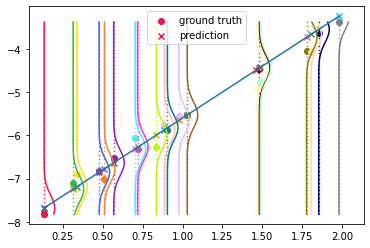

In [11]:
grad = (Y[-1] - Y[0]) / (X[-1] - X[0])
print(grad)

class LinearModel:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, x):
        return self.b + self.w * x

model = LinearModel(grad, -8)

for i in range(len(X)):
    color = colors[i%len(colors)]
    if i == 0:
        plt.scatter(X[i], Y[i], c=color, label='ground truth')
        plt.scatter(X[i], model(X[i]), marker='x', c=color, label='prediction')
    plt.scatter(X[i], Y[i], c=color)
    plt.scatter(X[i], model(X[i]), marker='x')
    plot_dist(X[i], model(X[i]))
    plt.legend()
plt.plot(X, model(X))
plt.show()